In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'drive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n', 
      os.listdir(path + 'test'),'\n', 
      os.listdir(path + '../metrics'),'\n', 
      os.listdir(path + '../scripts'))

['train_label.csv', 'train_activity.csv', 'train_combat.csv', 'train_payment.csv', 'train_pledge.csv', 'train_trade.csv'] 
 ['test1_payment.csv', 'test2_payment.csv', 'test1_activity.csv', 'test1_combat.csv', 'test1_pledge.csv', 'test1_trade.csv', 'test2_activity.csv', 'test2_combat.csv', 'test2_pledge.csv', 'test2_trade.csv'] 
 ['score_function.py', '자체성능평가함수안내.pdf', 'score_function.r', '__pycache__', 'lhh_inference', 'bjw_inference', 'hh_inference', 'metrics_test_lhh.ipynb', 'nes_inference'] 
 ['explortary data', 'model']


# train

In [0]:
train_label = pd.read_csv(path + 'train/train_label.csv')
train_activity = pd.read_csv(path + 'train/train_activity.csv')
train_combat = pd.read_csv(path + 'train/train_combat.csv')
train_payment = pd.read_csv(path + 'train/train_payment.csv')
train_pledge = pd.read_csv(path + 'train/train_pledge.csv')
train_trade = pd.read_csv(path + 'train/train_trade.csv')

# test

In [0]:
# test_label = pd.read_csv(path + 'test/test_label.csv')
test1_activity = pd.read_csv(path + 'test/test1_activity.csv')
test2_activity = pd.read_csv(path + 'test/test2_activity.csv')

test1_combat = pd.read_csv(path + 'test/test1_combat.csv')
test2_combat = pd.read_csv(path + 'test/test2_combat.csv')

test1_payment = pd.read_csv(path + 'test/test1_payment.csv')
test2_payment = pd.read_csv(path + 'test/test2_payment.csv')

test1_pledge = pd.read_csv(path + 'test/test1_pledge.csv')
test2_pledge = pd.read_csv(path + 'test/test2_pledge.csv')

test1_trade = pd.read_csv(path + 'test/test1_trade.csv')
test2_trade = pd.read_csv(path + 'test/test2_trade.csv')

# EDA

In [6]:
print(train_label.shape)
train_label.head()

(40000, 3)


,acc_id,survival_time,amount_spent
0,27835,64,0.002559
1,12351,64,0.120154
2,125437,55,0.182593
3,104483,64,0.016241
4,4704,20,0.226396


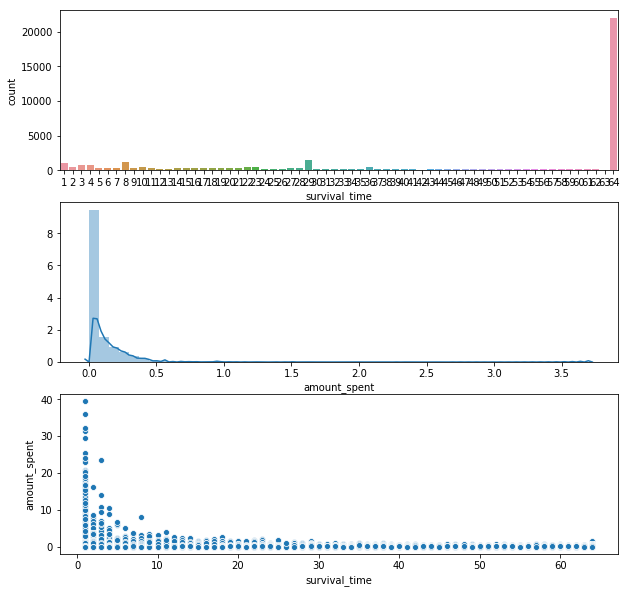

In [16]:
plt.subplots(figsize=(10, 10))
plt.subplot(3, 1, 1)
sns.countplot(train_label['survival_time'])

plt.subplot(3, 1, 2)
sns.distplot(np.log1p(train_label['amount_spent']))

plt.subplot(3, 1, 3)
sns.scatterplot(x='survival_time', y='amount_spent', data=train_label)
plt.show()

In [0]:
train_label.columns

Index(['acc_id', 'survival_time', 'amount_spent'], dtype='object')

In [0]:
train_activity[train_activity['acc_id']==75001]

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,1.105140,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,4.708505e-02,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,-0.013963,0.0
55186,2,75001,397380,aa,2.237666,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,2.100972,0.129149,0.0
55187,2,75001,216231,aa,0.234066,0.789428,1.724942e-02,0.000000,0.000868,0,0.000000,0.000000,0.0,0.000000,0.000000,-0.043915,0.0
110143,3,75001,397380,aa,2.616853,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,2.410407,0.144249,0.0
110144,3,75001,216231,aa,0.411955,0.385252,1.155279e-02,0.000000,0.002603,0,0.000000,0.000000,0.0,0.000000,0.000000,0.536479,0.0
110145,3,75001,201431,aa,0.074901,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,-0.000003,0.0
165244,4,75001,397380,aa,3.225423,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,3.025921,-0.846301,0.0
165245,4,75001,216231,aa,0.147461,0.531580,8.370311e-03,0.017957,0.002169,1,0.000000,0.000000,0.0,0.000000,0.000000,-0.001642,0.0
220059,5,75001,397380,aa,2.921138,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,2.768917,0.179164,0.0


In [0]:
train_activity = pd.read_csv(path + 'train/train_activity.csv')
train_combat = pd.read_csv(path + 'train/train_combat.csv')
train_payment = pd.read_csv(path + 'train/train_payment.csv')
train_pledge = pd.read_csv(path + 'train/train_pledge.csv')
train_trade = pd.read_csv(path + 'train/train_trade.csv')

In [0]:
set(train_label['acc_id']) - set(train_activity['acc_id']), set(train_activity['acc_id']) - set(train_label['acc_id'])

(set(), set())

In [0]:
set(train_label['acc_id']) - set(train_combat['acc_id']), set(train_combat['acc_id']) - set(train_label['acc_id'])

(set(), set())

In [0]:
list(set(train_label['acc_id']) - set(train_payment['acc_id']))[:5], set(train_payment['acc_id']) - set(train_label['acc_id'])

([2, 65540, 5, 98308, 98309], set())

In [0]:
list(set(train_label['acc_id']) - set(train_pledge['acc_id']))[:5], set(train_pledge['acc_id']) - set(train_label['acc_id'])

([2, 98308, 98313, 32793, 65567], set())

In [0]:
list(set(train_label['acc_id']) - set(train_trade['source_acc_id']))[:5], list(set(train_trade['source_acc_id']) - set(train_label['acc_id']))[:5]

([32771, 65540, 5, 32773, 98309], [6, 13, 18, 19, 22])

In [0]:
test1_pledge['acc_id'].isin(test2_pledge['acc_id']).sum()

0

In [0]:
train_pledge['acc_id'].isin(test2_pledge['acc_id']).sum()

0

In [0]:
train_pledge['acc_id'].isin(test1_pledge['acc_id']).sum()

0

# 결론

1. train, test1, test2 acc_id 안겹친다.